## Import Packages

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

## Data Wrangling

### Gathering Data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mfayyadhr/capstone/main/destinasi-wisata-indonesia.csv", sep=';')
df['Rating'] = df['Rating']/10
df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Rating_Count
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000.0,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-61753924.0,1.068272e+09,18.0
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0.0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-61376448.0,1.068171e+09,25.0
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000.0,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-61253124.0,1.068335e+09,19.0
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000.0,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-63024459.0,1.068952e+09,21.0
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000.0,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-612419.0,1.068391e+08,24.0


### Assessing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      430 non-null    object 
 4   City          430 non-null    object 
 5   Price         430 non-null    float64
 6   Rating        430 non-null    float64
 7   Time_Minutes  204 non-null    float64
 8   Coordinate    430 non-null    object 
 9   Lat           430 non-null    float64
 10  Long          430 non-null    float64
 11  Rating_Count  430 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 41.1+ KB


In [5]:
print(df.isna().sum())
print("Jumlah duplikasi: ", df.duplicated().sum())
df.describe()

Place_Id          0
Place_Name        0
Description       0
Category          7
City              7
Price             7
Rating            7
Time_Minutes    233
Coordinate        7
Lat               7
Long              7
Rating_Count      7
dtype: int64
Jumlah duplikasi:  0


,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Rating_Count
count,437.000000,430.000000,430.000000,204.000000,4.300000e+02,4.300000e+02,430.000000
mean,219.000000,24797.674419,4.246047,82.426471,-6.083609e+07,9.126037e+08,22.444186
std,126.295289,66930.762988,0.907580,52.937080,2.448880e+07,3.863997e+08,4.721167
min,1.000000,0.000000,0.400000,10.000000,-8.197894e+07,1.076170e+05,11.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.334351e+07,1.068217e+09,19.000000
50%,219.000000,5000.000000,4.500000,60.000000,-6.935712e+07,1.076315e+09,22.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.194887e+07,1.104204e+09,25.000000
max,437.000000,900000.000000,4.900000,360.000000,1.078880e+05,1.128217e+09,39.000000


### Cleaning Data









In [6]:
df.dropna(axis=0, inplace=True)
print(df.isna().sum())
df.info()

Place_Id        0
Place_Name      0
Description     0
Category        0
City            0
Price           0
Rating          0
Time_Minutes    0
Coordinate      0
Lat             0
Long            0
Rating_Count    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      204 non-null    int64  
 1   Place_Name    204 non-null    object 
 2   Description   204 non-null    object 
 3   Category      204 non-null    object 
 4   City          204 non-null    object 
 5   Price         204 non-null    float64
 6   Rating        204 non-null    float64
 7   Time_Minutes  204 non-null    float64
 8   Coordinate    204 non-null    object 
 9   Lat           204 non-null    float64
 10  Long          204 non-null    float64
 11  Rating_Count  204 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 20.7+ KB


In [ ]:
#df.to_csv('clean.csv', index=False)

## Exploratory Data Analysis

<Axes: xlabel='Category'>

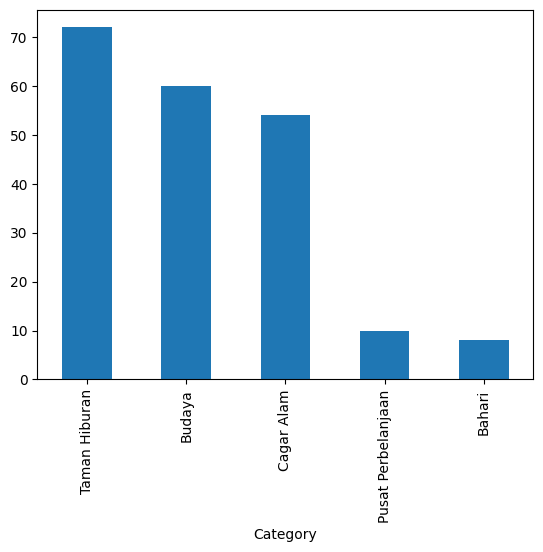

In [7]:
df['Category'].value_counts().plot(kind='bar')

<Axes: xlabel='City'>

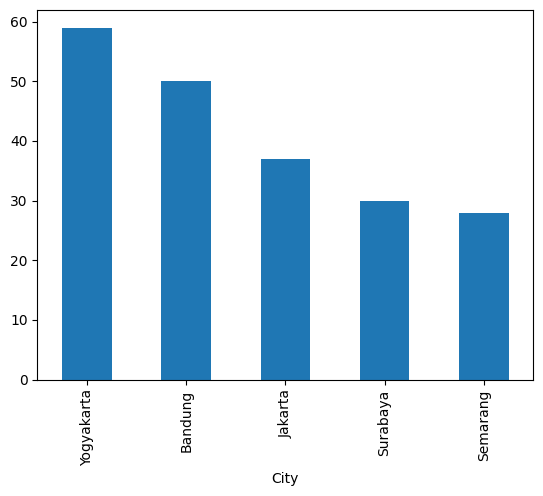

In [8]:
df['City'].value_counts().plot(kind='bar')

## Build two recommendation engines

In [97]:
city = df['City']

def recommendation(place_name, city):
  data = df.loc[df['City'] == city]
  data.reset_index(level = 0, inplace = True)
  place_name = data['Place_Name']
  idx = pd.Series(data.index, index = data['Place_Name']) # Convert the index into series

  # Convert each place name into vectors using TF-IDF and bigram
  tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
  tfidf_matrix = tf.fit_transform(data['Place_Name'])

  # Calculate the similarity between place name using cosine similarity
  sg = cosine_similarity(tfidf_matrix, tfidf_matrix)

  # Get the index corresponding to place name
  sig = list(enumerate(sg[idx])) # Sort the place name
  sig = sig[1:6] # indicies

  # Top 5 recommendation
  print(data[['Place_Name', 'City']].iloc[ [i[0] for i in sig] ])

In [98]:
recommendation("Trans Studio Bandung", "Bandung")

                        Place_Name     City
1  Taman Hutan Raya Ir. H. Djuanda  Bandung
2           Kebun Binatang Bandung  Bandung
3    Museum Konferensi Asia Afrika  Bandung
4                   Dago Dreampark  Bandung
5             Orchid Forest Cikole  Bandung
